# Achievement 6.5 Unsupervised ML using K-Means Clustering:

### Sections:
- Library & data Importing
- Data Review
- K-Means Preparation (Elbow Technique)
- K-means Plotting & Preliminary results review
- Z-score Standardization & Re-testing K-Means
- Final Comments

### Section 1: Library & Data importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
import scipy 
from scipy import stats 

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\mojos\Documents\Career Foundry Course\Data Immersion\Section 6\AirBnB Amsterdam Project\AirBnB Data'
path2 = r'C:\Users\mojos\Documents\Career Foundry Course\Data Immersion\Section 6\AirBnB Amsterdam Project\AirBnB Visualizations'

In [4]:
df = pd.read_csv(os.path.join(path,'Prepared','listings_sub1k.csv'),index_col = 0)

### Section 2: Data Review

In [5]:
df.head()

,id,name,summary,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,rated,pricing_tier,group_size,groupsize_pricing_combined,distance_from_center
0,2818,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,3159,t,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,Private room,...,97.0,9.0,10.0,t,2.10,True,Low,Small,Small Low,2.550299
1,3209,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,3806,f,Westerpark,52.390225,4.873924,Apartment,Entire home/apt,...,96.0,9.0,9.0,f,1.03,True,Mid-High-End,Large,Large Mid-High-End,3.249737
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",59484,f,Centrum-Oost,52.365087,4.893541,Townhouse,Entire home/apt,...,87.0,10.0,9.0,f,2.18,True,Low,Small,Small Low,0.771682
3,25428,Lovely apt in City Centre (Jordaan),NaN,56142,f,Centrum-West,52.373114,4.883668,Apartment,Entire home/apt,...,100.0,10.0,10.0,f,0.09,True,Mid-Low-End,Medium,Medium Mid-Low-End,1.520884
4,27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,t,Centrum-West,52.386727,4.892078,Houseboat,Private room,...,99.0,10.0,10.0,t,2.03,True,Mid-High-End,Small,Small Mid-High-End,2.280408


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17341 entries, 0 to 20007
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          17341 non-null  int64  
 1   name                        17314 non-null  object 
 2   summary                     16908 non-null  object 
 3   host_id                     17341 non-null  int64  
 4   host_is_superhost           17339 non-null  object 
 5   neighbourhood_cleansed      17341 non-null  object 
 6   latitude                    17341 non-null  float64
 7   longitude                   17341 non-null  float64
 8   property_type               17341 non-null  object 
 9   room_type                   17341 non-null  object 
 10  accommodates                17341 non-null  int64  
 11  bedrooms                    17341 non-null  float64
 12  beds                        17341 non-null  float64
 13  bed_type                    17341 no

C:\Users\mojos\AppData\Local\Temp\ipykernel_22072\1549863734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=25)
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

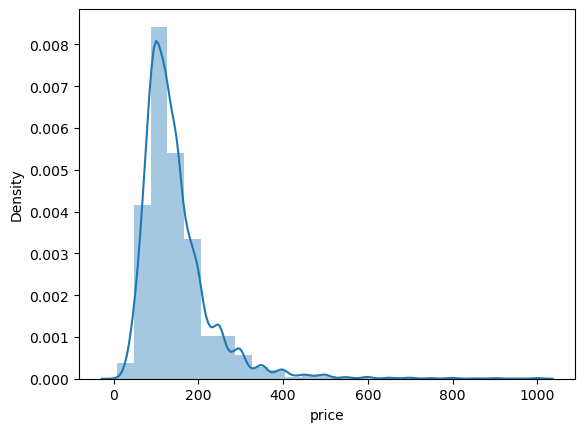

In [7]:
sns.distplot(df['price'], bins=25)

In [8]:
#To reduce the tail to try an avoid skewing the data and cusing bias in the K-means test we'll reduce the DF size to 
# values under to st.devs from mean (identified previously)
df2 = df[df['price']<=406]

In [9]:
#Isolating 'useful' quantitative variables into a smaller df:

quant_columns = ['accommodates','price','review_scores_rating','review_scores_location','review_scores_value','distance_from_center']
df3 = df2[quant_columns]
df3.head()

,accommodates,price,review_scores_rating,review_scores_location,review_scores_value,distance_from_center
0,2,59.0,97.0,9.0,10.0,2.550299
1,5,160.0,96.0,9.0,9.0,3.249737
2,2,80.0,87.0,10.0,9.0,0.771682
3,3,125.0,100.0,10.0,10.0,1.520884
4,2,150.0,99.0,10.0,10.0,2.280408


### Section 3: Elbow Technique To Identify Cluster Count

In [10]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
score = [kmeans[i].fit(df3).score(df3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\mojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-72737100.52391514,
 -26421810.87292727,
 -13231887.77017572,
 -8337608.162140505,
 -5946923.373842645,
 -4284490.894348909,
 -3412436.072830702,
 -2582817.7389522744,
 -2238266.5248305756]

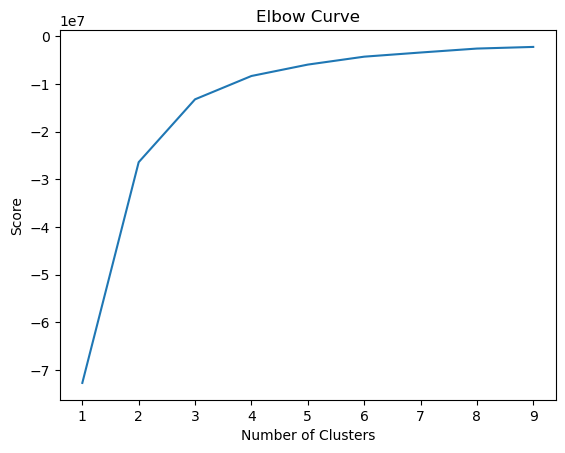

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [14]:
df3['clusters'] = kmeans.fit_predict(df3)

C:\Users\mojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mojos\AppData\Local\Temp\ipykernel_22072\2121862071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clusters'] = kmeans.fit_predict(df3)


In [15]:
df3.head()

,accommodates,price,review_scores_rating,review_scores_location,review_scores_value,distance_from_center,clusters
0,2,59.0,97.0,9.0,10.0,2.550299,1
1,5,160.0,96.0,9.0,9.0,3.249737,0
2,2,80.0,87.0,10.0,9.0,0.771682,1
3,3,125.0,100.0,10.0,10.0,1.520884,1
4,2,150.0,99.0,10.0,10.0,2.280408,0


In [16]:
df3['clusters'].value_counts()

clusters
1    9567
0    5836
2    1670
Name: count, dtype: int64

### Section 4: K-Means Visualization & Analysis

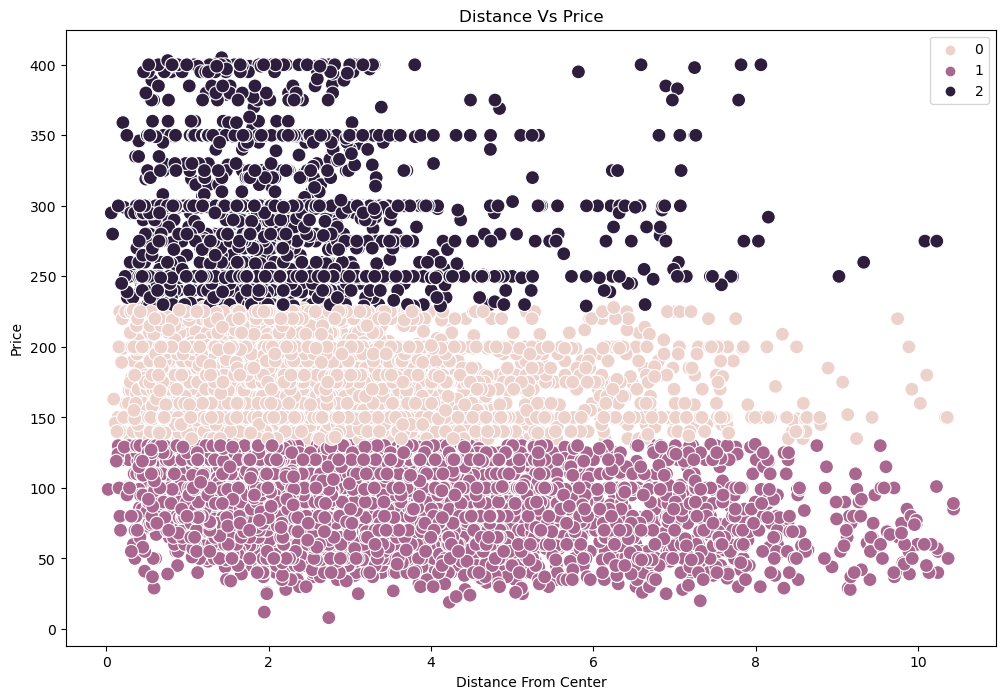

In [17]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['distance_from_center'], y=df3['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance From Center') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.title('Distance Vs Price')  
plt.savefig(os.path.join(path2,'Clustering_price_distance'),bbox_inches='tight')
plt.show()

#### It's clear from this visualization that the 'price' variable is perhaps the main distinguishing point of the generated clusters. There are mostly clear cut-off points bwteen the groupings at around 140 Euro and then again at around 230 Euro. What we can see in the groupings though is that group 2 (black) represent a collection of data points with a larger price and a more consistent priximity to the city center. Group 0 (pink) & 1 (purple) on the other hand have the highest density, being concentrating within their own aformentioned price groupings. What's interesting however is how both groups have their main concentration of data points within 0-4km of the city center, followed by a gradual decline in data point density as they move further away. Group 0, manages to retain it's density for an additional 2km, and even at the end of the plot at around the 10km mark, there are still pockets of datapoints. Group 1 on the other hand remains extremely dense up until roughly 6 km, where there is then a slight reduction in density,  and then a batch of scattered, isolated data points around the 8-10km range.

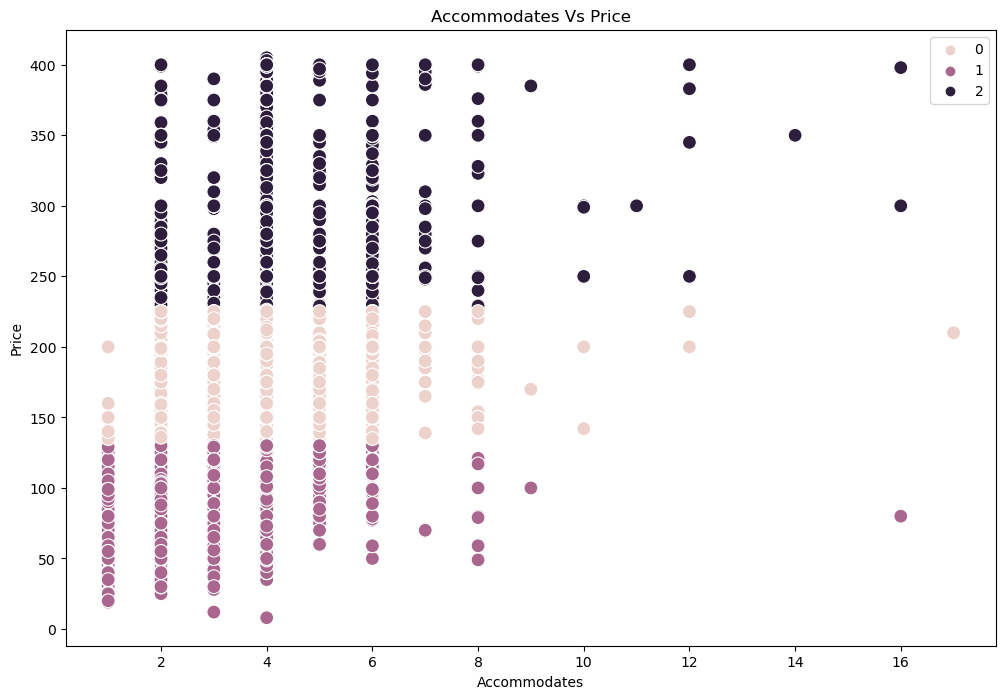

In [18]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['accommodates'], y=df3['price'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Accommodates Vs Price')  
plt.savefig(os.path.join(path2,'Clustering_price_accommodates'),bbox_inches='tight')
plt.show()

#### As with the prior visualization, Price is evidently the key factor controlling clustering. Group 0 is predomitaly made up of cheaper properties that allow for small groups of guests. Group 1 on the other hand is a middle-ground in terms of pricing, though the accommodation capabilities between the groupings are fairly consistent. Group 2 is the most remarkable shift from the other 2 as the values are less concentrated and have a wider spread with the price ranges encompassing close to half of the prices range. As with the other datapoints, the listings which accommodate above 8 guests appear to be outliers as their datapoints are sporaidic across the groupings BUT, are smarginally more prevelant within the higher price points, which is expected.

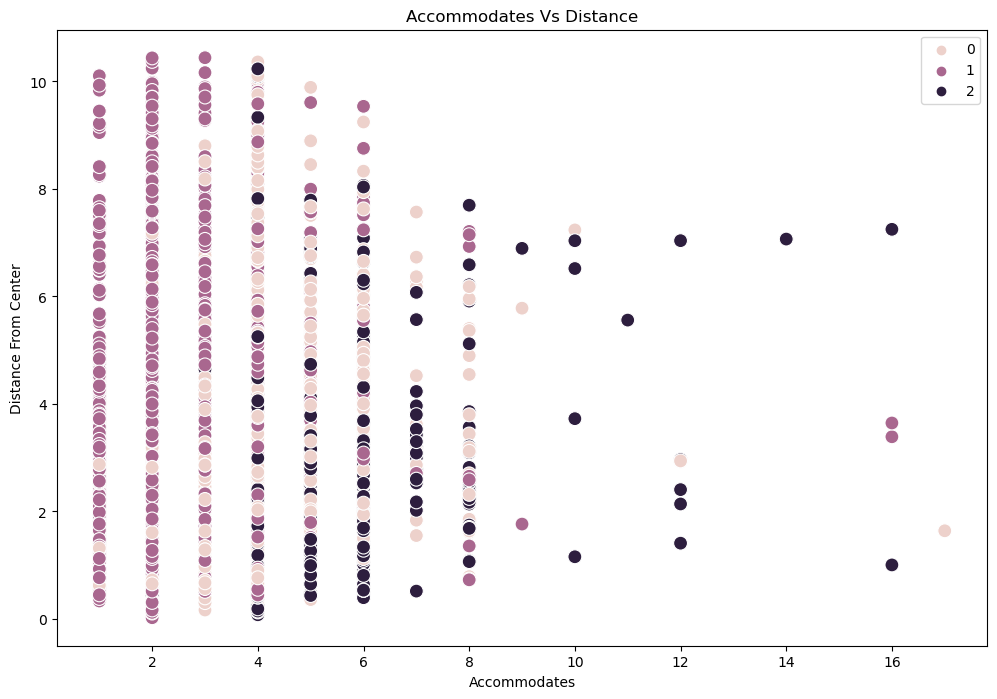

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['accommodates'], y=df3['distance_from_center'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Accommodates')
plt.ylabel('Distance From Center')
plt.title('Accommodates Vs Distance')  
plt.savefig(os.path.join(path2,'Clustering_distance_accommodates'),bbox_inches='tight')
plt.show()

#### So far, this is the most interesting plot because we aren't leveraging the price value which seems to have been the main factor deciding the groupings. Keeping in mind the prior behaviour of the clusters (0 / pink = 'cheaper', 1 / purple = 'mid_tier', 2 / black = 'premium'), we can see that the pink 'cheaper' cluster tends to mainly host individuals or couple, but there is no pattern relating to their proximity to the city. This would make sense given the 'cheaper' option may consist of private bedrooms in shared homes, or even 'hotel' style rooms. In this plot, the difference bwteen clusters 1-2 isn't particularly discernable, though it is clear they predominantly make up properties that cater to smaller groups and beyond. There is too many characteristics of each property which aren't accounted for here that prevent us from making additional deductions from this visualization alone.

### Section 5: Re-testing K-Means Clustering using Z-Score Values:

#### In order to assist with this task we need to standardize the pricing values so that they don't result in biasing the K-means testing. Standardization will be done based on the z score method. The 3 main quantitative columns (accommodates, price, distance) will be ran through this process. Whilst accommodates and distance are already at a similar scale, values between 1-16 and then 1-10 respectively, price returns values between 20-406, so the values are evidently skewed in it's favour)

In [20]:
#Before Generating the Zscores, I want to briefly pier into the accommodation values above 8, as the few instance may cause some issues
# though I'm cautious not to be overzealous with what I remove so as not to make the model too biased.

accommodation_subset = df3[df3['accommodates']>8]
accommodation_subset.shape

#Since it's only 23 values (0.1% of the dataset), I'll remove them before proceeding

(23, 7)

In [21]:
df4 = df3[df3['accommodates']<=8]

In [22]:
df4['accommodates_zscore'] = stats.zscore(df4['accommodates'])
df4['price_zscore'] = stats.zscore(df4['price'])
df4['distance_zscore'] = stats.zscore(df4['distance_from_center'])

C:\Users\mojos\AppData\Local\Temp\ipykernel_22072\3430776072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['accommodates_zscore'] = stats.zscore(df4['accommodates'])
C:\Users\mojos\AppData\Local\Temp\ipykernel_22072\3430776072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_zscore'] = stats.zscore(df4['price'])
C:\Users\mojos\AppData\Local\Temp\ipykernel_22072\3430776072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [23]:
df4.head()

,accommodates,price,review_scores_rating,review_scores_location,review_scores_value,distance_from_center,clusters,accommodates_zscore,price_zscore,distance_zscore
0,2,59.0,97.0,9.0,10.0,2.550299,1,-0.736558,-1.246279,-0.147288
1,5,160.0,96.0,9.0,9.0,3.249737,0,1.987588,0.314553,0.309425
2,2,80.0,87.0,10.0,9.0,0.771682,1,-0.736558,-0.921749,-1.308671
3,3,125.0,100.0,10.0,10.0,1.520884,1,0.171491,-0.226329,-0.819465
4,2,150.0,99.0,10.0,10.0,2.280408,0,-0.736558,0.160015,-0.323518


C:\Users\mojos\AppData\Local\Temp\ipykernel_22072\564901711.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['accommodates_zscore'], bins=50)
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='accommodates_zscore', ylabel='Density'>

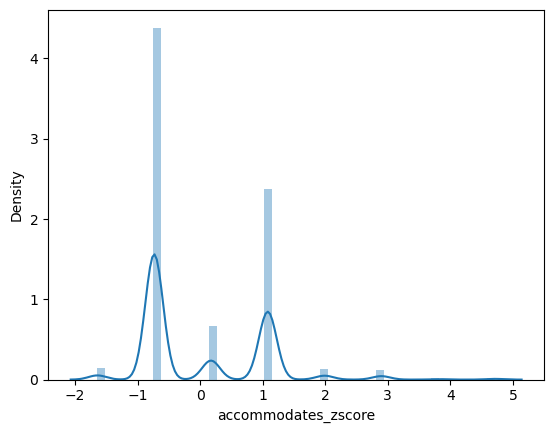

In [24]:
sns.distplot(df4['accommodates_zscore'], bins=50)

In [25]:
df4[df4['accommodates_zscore']>=4] #76 values out of 17000+, these will remain in the dataset as they are legitimate.

,accommodates,price,review_scores_rating,review_scores_location,review_scores_value,distance_from_center,clusters,accommodates_zscore,price_zscore,distance_zscore
459,8,275.0,97.0,10.0,9.0,1.850281,2,4.711734,2.091737,-0.604378
672,8,399.0,99.0,10.0,10.0,2.136456,2,4.711734,4.008006,-0.417515
760,8,376.0,95.0,10.0,9.0,1.824910,2,4.711734,3.652569,-0.620945
834,8,250.0,100.0,8.0,8.0,2.818984,2,4.711734,1.705393,0.028156
979,8,300.0,95.0,10.0,9.0,2.203531,2,4.711734,2.478082,-0.373716
1430,8,350.0,99.0,10.0,10.0,3.565931,2,4.711734,3.250771,0.515890
1495,8,177.0,94.0,9.0,9.0,4.898309,0,4.711734,0.577267,1.385893
1542,8,300.0,93.0,9.0,9.0,3.857719,2,4.711734,2.478082,0.706419
1742,8,240.0,93.0,10.0,9.0,2.299421,2,4.711734,1.550855,-0.311103
1912,8,175.0,100.0,8.0,9.0,5.402582,0,4.711734,0.546360,1.715168


C:\Users\mojos\AppData\Local\Temp\ipykernel_22072\3565911300.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price_zscore'], bins=50)
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_zscore', ylabel='Density'>

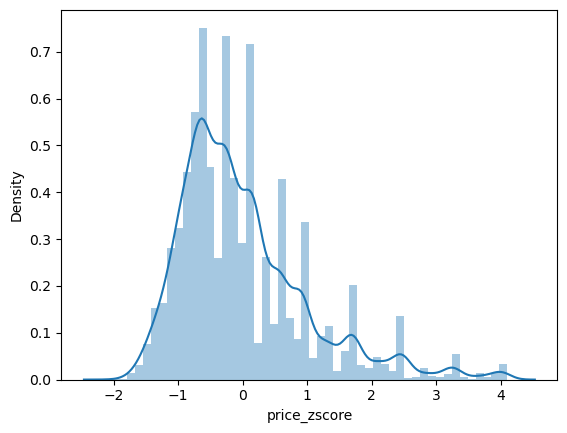

In [26]:
sns.distplot(df4['price_zscore'], bins=50)

C:\Users\mojos\AppData\Local\Temp\ipykernel_22072\2334545749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['distance_zscore'], bins=50)
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance_zscore', ylabel='Density'>

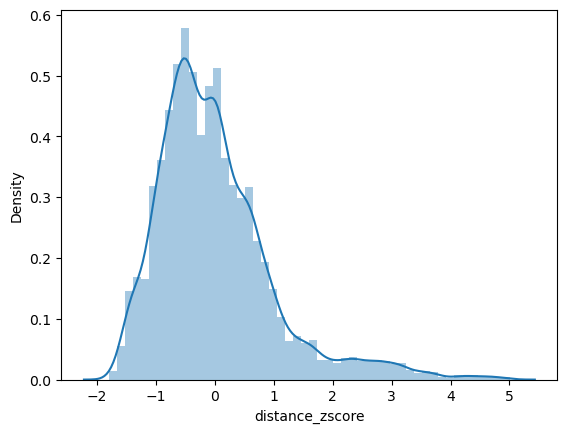

In [27]:
sns.distplot(df4['distance_zscore'], bins=50)

In [28]:
#Final DF of just our new Z-Score Values:

zscore_columns = ['accommodates_zscore','price_zscore','distance_zscore']
df5 = df4[zscore_columns]
df5.head()

,accommodates_zscore,price_zscore,distance_zscore
0,-0.736558,-1.246279,-0.147288
1,1.987588,0.314553,0.309425
2,-0.736558,-0.921749,-1.308671
3,0.171491,-0.226329,-0.819465
4,-0.736558,0.160015,-0.323518


In [29]:
df5.shape

(17050, 3)

In [30]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [31]:
score2 = [kmeans[i].fit(df5).score(df5) for i in range(len(kmeans))]
score2

C:\Users\mojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-51150.00000000001,
 -32215.754889968513,
 -24087.578554238928,
 -19384.23559132966,
 -16062.510700548934,
 -14253.084862348673,
 -12710.90654171881,
 -11613.606034890709,
 -10619.943026110597]

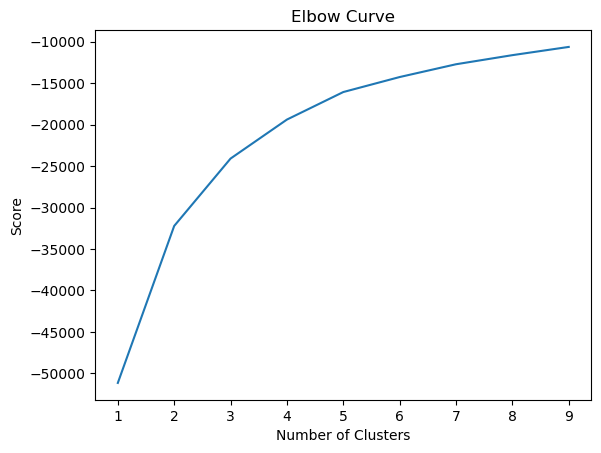

In [32]:
pl.plot(num_cl,score2)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Required qt. of clusters appears to be around 3. Visually, the 3 position represents the corner of the bend, where there is the reduction in 'score' (on the y axis) starts to become incrementally more negligable.

In [33]:
kmeans = KMeans(n_clusters = 3)

In [34]:
kmeans.fit(df5)

C:\Users\mojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [35]:
df5['clusters'] = kmeans.fit_predict(df5)

C:\Users\mojos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mojos\AppData\Local\Temp\ipykernel_22072\2192654639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['clusters'] = kmeans.fit_predict(df5)


In [36]:
df5.head()

,accommodates_zscore,price_zscore,distance_zscore,clusters
0,-0.736558,-1.246279,-0.147288,1
1,1.987588,0.314553,0.309425,2
2,-0.736558,-0.921749,-1.308671,1
3,0.171491,-0.226329,-0.819465,1
4,-0.736558,0.160015,-0.323518,1


In [37]:
df5['clusters'].value_counts()

clusters
1    9775
2    5253
0    2022
Name: count, dtype: int64

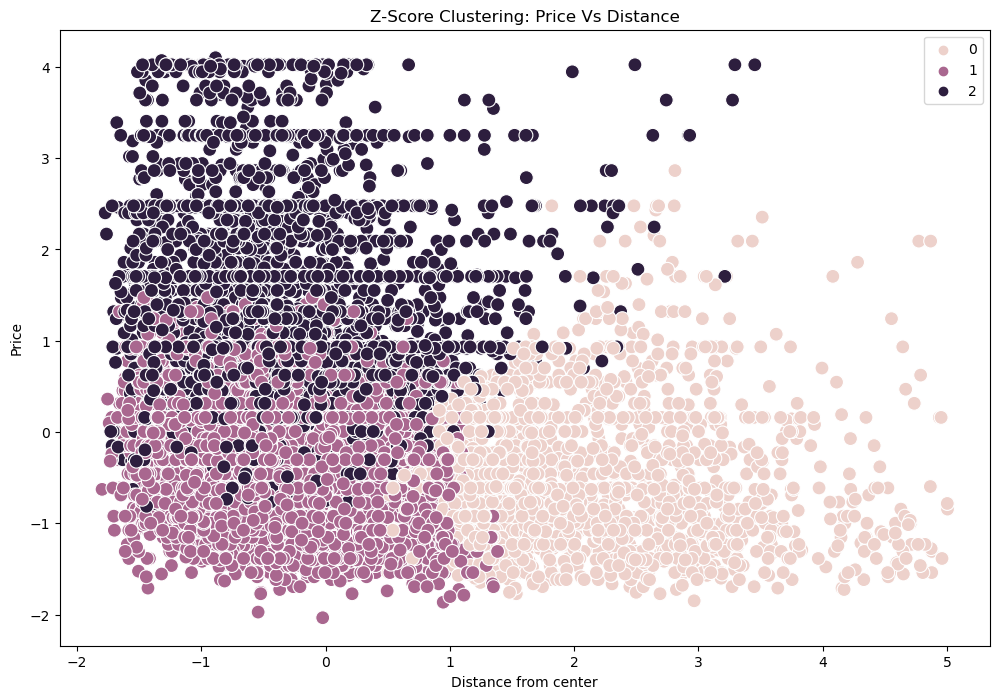

In [38]:
# Plot the clusters for the "Price" and "Distance from Center" variables [Z-Score Values].

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df5['distance_zscore'], y=df5['price_zscore'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Distance from center')
plt.ylabel('Price')
plt.title('Z-Score Clustering: Price Vs Distance')  
plt.savefig(os.path.join(path2,'Z-score_Clustering_distance_price'),bbox_inches='tight')
plt.show()

#### The clusters generated by this second dataset relying on z-scores provides a much more intriguing perspective on the relationships found int the data set.

#### whilst there is of course the overlaping central section of the cluster which we can't really discern too much about due to the density of data points I think there are some clear distinctions which can be made. Group 0 - Pink - These listings are an interesting combination of overly 'cheap' or below average prices, whilst also maintaing some of the best locations (from a geographic perspective) being as close to town center as possible. Group 1 - Purple, on the other hand are the expensive listings in the same location (one could imagine they are the larger properties downtown) - The final grouping which is 2 - Black, make up the portion of listings which are further out, and at a respectable price.

#### To summarize, the clusters at this stage indicate that there are two groups 'cheaper' and 'more expensive' located closer to town, and then a final group which is 'relatively affordable', but which has a tendancy to be further out.

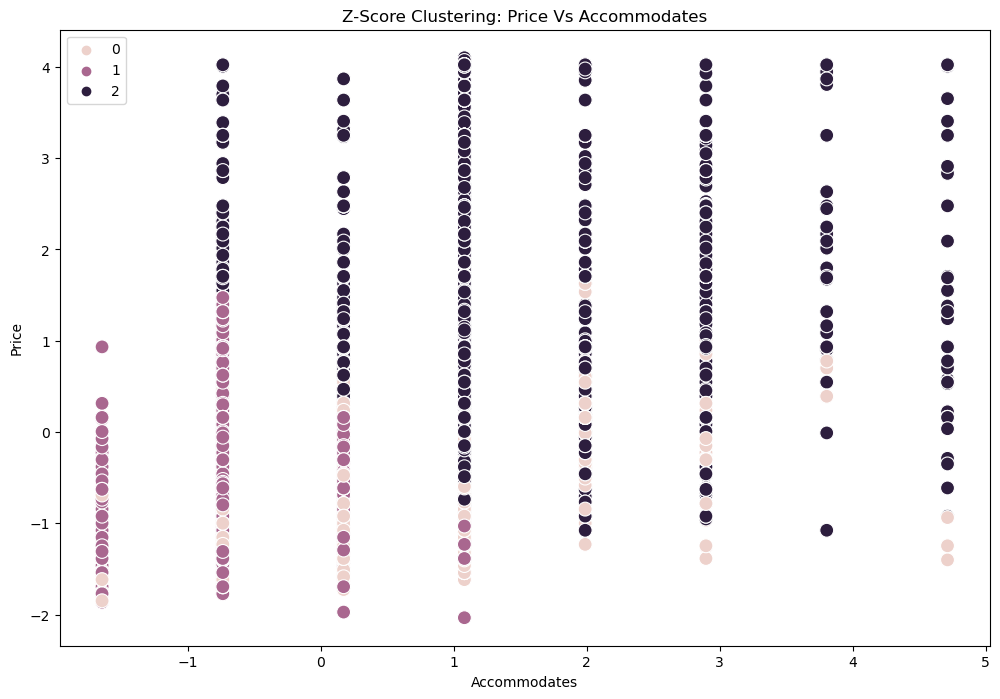

In [39]:
# Plot the clusters for the "Price" and "Accommodates" variables [Z-Score Values].

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df5['accommodates_zscore'], y=df5['price_zscore'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Accommodates') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.title('Z-Score Clustering: Price Vs Accommodates') 
plt.savefig(os.path.join(path2,'Z-score_Clustering_accommodates_price'),bbox_inches='tight')
plt.show()

#### Much like the pre-Z-Score cluster, Accommodation_zscore & price_zscore supports the arguments made previously about smaller, closer properties such as private rooms, hostels etc. Since Group 0 is the largest, we could deduce that these smaller listings in the town center are 'cheaper' because they are extremely abundant and also don't require much space. This cluster is definitely a case of quantity (short term stays) trumping quality, I'd imagine.

#### It's hard to say much about group 2 -  Black, as they visually aren't very present due to the density of the other groupings. We can see that their data points are spread across the graph and with our knowledge of the prior plot we can surmise, that because of their spread and the fact that their distance is often further away than Groups 0 & 1, their distance allows for a wider spread of both prices and accommodation sizes. Distance from city center would allow a wider range of prices to occur (e.g a private room 8km from Amsterdam would be an extremely cheap option for those willing to commute in, whilst the space available in the suburbs would allow for some larger group sizes to stay  in a whole house at a more reasonable price than, say, a downtown penthouse (as an example).

#### Group 1 on the other hand represents the most extreme spread of data points ranging from expensive, below-average size properties to the largest properties at 'reasonable' prices.

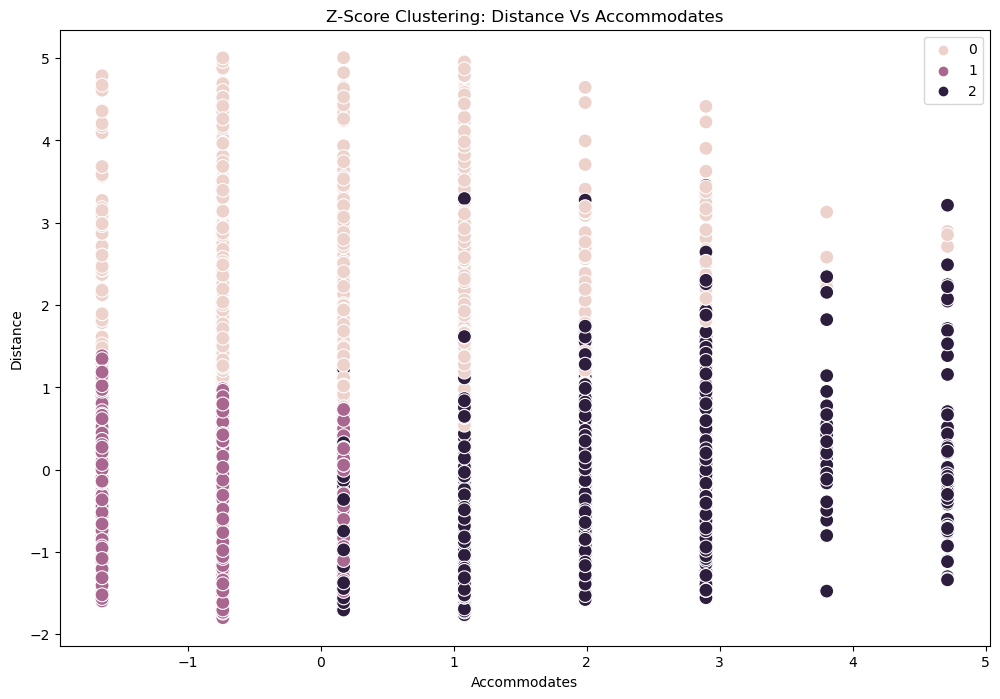

In [40]:
# Plot the clusters for the "Distance" and "Accommodates" variables [Z-Scores].

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df5['accommodates_zscore'], y=df5['distance_zscore'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Accommodates')
plt.ylabel('Distance')
plt.title('Z-Score Clustering: Distance Vs Accommodates')  
plt.savefig(os.path.join(path2,'Z-score_Clustering_accommodates_distance'),bbox_inches='tight')
plt.show()

#### This final plot helps bolster some of the initial thoughts we gained from the first z-score related plot. The 'cheaper' cluster which we had identified as group 0 - pink coorborates those findings as we can now tell that these are a very specific cluster of cheaper, closer, and smaller properties.

#### Group 1 - purple on the other hand is as expected, a combination of cheaper properties that are able to be priced at a more competitive pricing because of their relative distance compared to the other clusters. They are above the mean distance, and their distance gives them flexibility in pricing and accommodation size.

#### Finally group 2 - black. As mentioned previously, this group was descriped as the high-end or premium listing. The problem with that description is that it doesn't take into consideration the causes for the higher price. We can see that they are generally closer and larger properties, but hgher pricing isn't a guarantee, as price above a certain point may take more factors into consideration (listing features, furnishings, rooms vs sofa beds in shared spaces, parking, etc. etc.)

In [41]:
df5.loc[df5['clusters'] == 2, 'cluster'] = 'dark purple'
df5.loc[df5['clusters'] == 1, 'cluster'] = 'purple'
df5.loc[df5['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\mojos\AppData\Local\Temp\ipykernel_22072\2737609708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.loc[df5['clusters'] == 2, 'cluster'] = 'dark purple'


In [42]:
df5.groupby('cluster').agg({'price_zscore':['mean', 'median'], 
                         'accommodates_zscore':['mean', 'median'], 
                         'distance_zscore':['mean', 'median']})

price_zscore           accommodates_zscore            \
                    mean    median                mean    median   
cluster                                                            
dark purple     0.948758  0.778166            1.136411  1.079539   
pink           -0.530590 -0.628128            0.258613  0.171491   
purple         -0.400099 -0.458136           -0.664193 -0.736558   

            distance_zscore            
                       mean    median  
cluster                                
dark purple       -0.304602 -0.366690  
pink               1.975908  1.712373  
purple            -0.245034 -0.277612

#### Because we are using z-scores, we don't have specific values to reference here that are in the units of the actual dataset (Euor, Guest qty., Km). That be said, it's still quite easy to see these median / mean values as a way of backing up or visual analysis performed previously.

#### In order:
- Dark Purple:    Highest Mean/Median Pricing, at almost 1 st.dev from mean. Also Largest properties, with both mean/median also being above 1 st.dev from mean. Lastly Distance, This is the actualy the strongest performer, as a far as distance from center z-score goes. marginally outpacing the second grouping. This group, on average, represents properties that by usual metrics (price, size, location) would be considered the most premium.
- Pink:     2nd in mean / median pricing, lowest mean / median accommodates scores and then second strongest performer in regards to distance. This group, as explained previously represents the best value pics for (presumably) short term rentals in the city center.
- Purple:      This represents the cheapest catagory, in regards to general mean / median pricing. Thye have slightly above average accommodation scores, indicating that they probably represent a more 'typical' group size of perhaps 2 couples  / average family. lastly, they represent the group furthest away from city center. This group, would perhaps represent value for money for families, or larger groups wo want a propertie that can accommodate their size, and they are will to compromise on some conveniences, in order to remain budget friendly.

### Section 6: Final Comments

#### ML Clustering as helped provide additional context between the 3 most important variables present as it removed some level of dimensionality that was hindering us from making specific inferences about how the 3 seperate variables relate to one another.

#### With an understanding of the relationships now made we can expand upon our original hypothesis - which was admitedly a bit simplistic - by acknowledging that yes, as we move further out, by-and-large things get cheaper, but there is also an aspect of property sizing which impacts the price, and those relationships are know visible.

#### What would be an interesting exercise for future analysis would be to know look into these groups and try and find an understanding of the variation within each group. I think that group 0 - pink, is 'almost' fully understood to be small, cheap, central properties (along the private room, shared room, hostel style of listings) so there may not be too much more to cover BUT i think groups 1 and 2 need further analysis. Because of the variation, it'll be useful to use catagorical data such as property type and room type (and neighbourhood even) to understand the contributors to pricing. It's important to know that 'distance' is a straight line value, that doesn't take into consideration any geographic limitations or neighbourhood characteristics. It may be interesting to use a point map to plot out these clusters to see where they fall and what additional insights they provide. Perhaps we can identify clusters of smaller properties, or more expensive properites in upscale neighbourhoods.

#### there is still lot's to uncover!

In [43]:
#Adding Z-score based clustering onto DF containing generalized values
df2['zscore_cluster_colour'] = df5['cluster']
clean_file = df2[df2['zscore_cluster_colour'].isnull()==False]

clean_file.shape

C:\Users\mojos\AppData\Local\Temp\ipykernel_22072\2352042205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore_cluster_colour'] = df5['cluster']


(17050, 32)

In [44]:
clean_file.to_csv(os.path.join(path,'Prepared','Clustered_data.csv'))